In [24]:
import os
import cv2
import numpy as np

data_dir = r"C:/Users/tejad/OneDrive/Desktop/semester 6/DLS/EndSem/floodDetector/floodDetector/dl_dataset/train"
categories = ["flooded", "nonflooded"]

X = []
y = []
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        print("\r",os.path.exists(img_path),end="  ")
        print("\r",img_path,end="   ")
        try:
          img = cv2.resize(img, (64, 64))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = img.astype("float32") / 255.0
          X.append(img)
          y.append(categories.index(category))
        except:
          print(img)

X = np.array(X)
y = np.array(y)

# Step 2: Split the dataset
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Step 3: Define the MLP classifier
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])




 C:/Users/tejad/OneDrive/Desktop/semester 6/DLS/EndSem/floodDetector/floodDetector/dl_dataset/train\nonflooded\nonflooded - Shortcut.lnk   None


In [25]:

# Step 2: Split the dataset
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:

# Step 3: Define the MLP classifier
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Step 4: Train the MLP classifier
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=30, batch_size=12)

Epoch 1/30
31/31 [==============================] - 7s 203ms/step - loss: 1.9273 - accuracy: 0.5108 - val_loss: 0.8760 - val_accuracy: 0.4894
Epoch 2/30
31/31 [==============================] - 6s 195ms/step - loss: 0.6477 - accuracy: 0.6478 - val_loss: 0.5153 - val_accuracy: 0.6809
Epoch 3/30
31/31 [==============================] - 6s 193ms/step - loss: 0.5876 - accuracy: 0.6909 - val_loss: 0.5027 - val_accuracy: 0.6702
Epoch 4/30
31/31 [==============================] - 6s 195ms/step - loss: 0.5781 - accuracy: 0.7527 - val_loss: 0.5537 - val_accuracy: 0.7128
Epoch 5/30
31/31 [==============================] - 6s 194ms/step - loss: 0.6315 - accuracy: 0.7312 - val_loss: 0.4293 - val_accuracy: 0.7553
Epoch 6/30
31/31 [==============================] - 6s 194ms/step - loss: 0.3881 - accuracy: 0.8468 - val_loss: 0.4288 - val_accuracy: 0.8085
Epoch 7/30
31/31 [==============================] - 6s 192ms/step - loss: 0.3988 - accuracy: 0.8306 - val_loss: 0.3759 - val_accuracy: 0.8298
Epoch 

In [28]:
# Step 5: Evaluate the MLP classifier
loss, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 19ms/step - loss: 0.7695 - accuracy: 0.7094


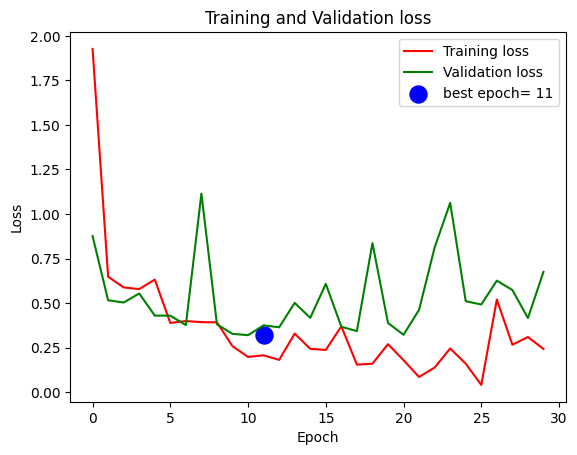

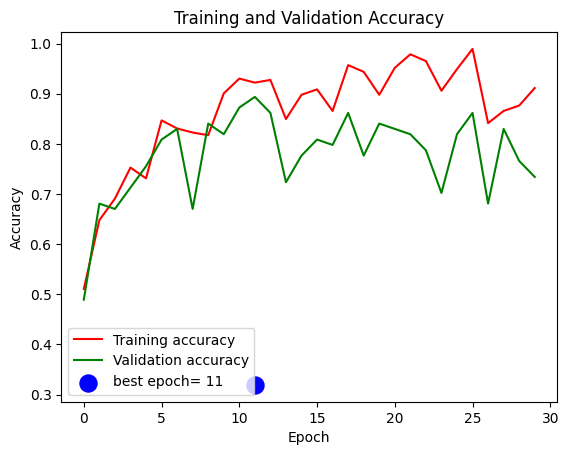

In [29]:
# Make a plot of training loss and validation loss to check for the regular fit of the trained network
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
loss_label = f'best epoch= {str(index_loss + 1)}'


plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.legend()
plt.show()
    
# Make a plot of training accuracy and validation accuracy to check for the regular fit of the trained network
plt.plot(history.history['accuracy'],'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'],'g', label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.legend()
plt.tight_layout
plt.show()


In [30]:
model.save("mlp")
model.save_weights("mlp.h5")

INFO:tensorflow:Assets written to: mlp\assets


INFO:tensorflow:Assets written to: mlp\assets


In [ ]:
import os
import numpy as np
import tensorflow as tf

# Input image dimensions
img_width, img_height = 256, 256

# Get the list of input images from a folder
input_folder ="C:/Users/tejad/OneDrive/Desktop/semester 6/DLS/EndSem/floodDetector/floodDetector/dl_dataset/train/flooded"
input_images = os.listdir(input_folder)

# Create an empty list to store the processed images
processed_images = []

# Preprocess the input images
for image_file in input_images:
    image_path = os.path.join(input_folder, image_file)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.image.resize(image, (256, 256))
    processed_images.append(image)

# Convert the processed images list to a NumPy array
X = np.array(processed_images)

# Normalize the input images
X = X / 255.0
N= 256
# Define the custom U-Net architecture
input = tf.keras.layers.Input(shape=(img_width, img_height, 3))
s = tf.keras.layers.Lambda(lambda x: x / N)(input)

# block 1
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

# block 2
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

# block 3
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
c3  = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

# block 4
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

# block 5
c5 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2, 2))(c5)

# block 6
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

# block 7 - back 1
u7 = tf.keras.layers.Conv2DTranspose(N, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c5])
c7 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(N, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

# block 8 - back 2
u8 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c4])
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

# block 9 - back 3
u9 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c3])
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

# block 10 - back 4
u10 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = tf.keras.layers.concatenate([u10, c2])
c10 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)
c10 = tf.keras.layers.Dropout(0.1)(c10)
c10 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)

# block 11 - back 5
u11 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c10)
u11 = tf.keras.layers.concatenate([u11, c1])
c11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)
c11 = tf.keras.layers.Dropout(0.1)(c11)
c11 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c11)

modelUNet = tf.keras.Model(inputs=input, outputs=outputs, name='U-NET')



# Compile the model
modelUNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
modelUNet.fit(X, y, epochs=5, batch_size=32)


In [ ]:

# Perform predictions on new images
new_input_folder = "C:/Users/tejad/OneDrive/Desktop/semester 6/DLS/EndSem/floodDetector/floodDetector/dl_dataset/test"
new_input_images = os.listdir(new_input_folder)

for image_file in new_input_images:
    image_path = os.path.join(new_input_folder, image_file)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    
    prediction = modelUNet.predict(image)
    
    # Process the prediction as needed
    # ...

    print(f"{image_file} -> {prediction}")


In [43]:
import cv2
import numpy as np

# # Assuming 'prediction' contains the output prediction array

# Apply thresholding to convert probabilities to binary mask
threshold = 0.5
mask = np.where(prediction > threshold, 1, 0)

# Convert mask to uint8 data type
mask = mask.astype(np.uint8)

# Resize mask to match the original image dimensions
resized_mask = cv2.resize(mask[0], (img_width, img_height))

# Display the original image and the generated mask
cv2.imshow("Original Image", cv2.imread("C:/Users/tejad/OneDrive/Desktop/semester 6/DLS/EndSem/floodDetector/floodDetector/dl_dataset/test/26.jpg"))
cv2.imshow("Generated Mask", resized_mask * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [48]:
import cv2
import numpy as np
import cv2


resized_mask = cv2.resize(mask[0], (img_width, img_height))

# Display the original image and the generated mask
cv2.imshow("Original Image", cv2.imread("C:/Users/tejad/OneDrive/Desktop/semester 6/DLS/EndSem/floodDetector/floodDetector/dl_dataset/test/26.jpg"))
cv2.imshow("Generated Mask", resized_mask * 255)
# Assuming 'prediction' contains the output prediction array

# Apply thresholding to convert probabilities to binary mask
threshold = 0.5
mask = np.where(prediction > threshold, 1, 0)

# Convert mask to uint8 data type
mask = mask.astype(np.uint8)

# Resize mask to match the original image dimensions
resized_mask = cv2.resize(mask[0], (img_width, img_height))

# Save the generated mask as an image
cv2.imwrite('generated_mask.png', resized_mask * 255)

# Load the masked image
masked_img = cv2.imread('generated_mask.png', 0) # Set the second argument to 0 to read the image as grayscale

# Calculate the total number of pixels in the masked image
total_pixels = masked_img.shape[0] * masked_img.shape[1]

# Count the number of pixels that are not equal to zero (i.e., masked)
masked_pixels = cv2.countNonZero(masked_img)

# Calculate the percentage of masked area
percent_masked = (masked_pixels / total_pixels) * 100
req=100-percent_masked
print('Percentage of masked area: {:.2f}%'.format(req))
# print('Percentage of masked area: {:.2f}%'.format(percent_masked))

Percentage of masked area: 80.83%


: 

In [40]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def preprocess_image(img_path):
    # Load image
    img = cv2.imread(img_path)
    
    # Resize image
    img = cv2.resize(img, (64, 64))
    
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Normalize pixel values
    img = img.astype("float32") / 255.0
    
    # Add an extra dimension to match the model's input shape
    img = np.expand_dims(img, axis=0)
    
    return img

# Load the model from an H5 file
model = load_model(r'C:\Users\tejad\OneDrive\Desktop\semester 6\DLS\EndSem\floodDetector\floodDetector\mlp')

# Provide the image path as input
image_path = "C:\\Users\\tejad\\Downloads\\jj.jpg"

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions using the loaded model
predictions = model.predict(preprocessed_image)

# Perform any further operations with the predictions as needed
print(predictions)

1/1 [==============================] - 0s 144ms/step
[[0.9987095]]


In [ ]:
model = tf.keras.models.load_model("unetModel")